# Head sizes and Brain weights of human beings - ML project2 

## Import the necessary liabraries

In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
plt.rcParams['figure.figsize'] = (20.0,10.0)

## Import dataset into pandas dataframe

In [125]:
headBrain_df = pd.read_csv(r'C:\Users\itumeleng\Desktop\Python Programs\headbrain.csv')

In [126]:
headBrain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [127]:
print('This dataset contains:', headBrain_df.shape[0],'observations and ', headBrain_df.shape[1], 'Attributes')

This dataset contains: 237 observations and  4 Attributes


### Get the Head size (X) in centimeters and Brain weight(Y) in grams for each observation

In [128]:
X = headBrain_df['Head Size(cm^3)'].values

In [129]:
Y = headBrain_df['Brain Weight(grams)'].values

### Get the average head size (x_bar) and the average brain weight (y_bar)

In [130]:
x_bar = np.mean(X)

In [131]:
y_bar = np.mean(Y)

### Find the total number of values

In [132]:
n = len(X)

### Implement Formula to find m and c coefficences

In [133]:
numer = 0

In [134]:
denom = 0

In [135]:
for i in range(n):
    numer += (X[i] - x_bar)*(Y[i] - y_bar)
    denom += (X[i] - x_bar)**2
m = numer / denom
c = y_bar - (m * x_bar)

In [136]:
print('The coefficents are as follows; m=',m,'and c=',c)

The coefficents are as follows; m= 0.26342933948939945 and c= 325.57342104944223


### Plotting values and regression line

In [137]:
max_x = np.max(X) + 100

In [138]:
min_x = np.min(X) - 100

### Calculating line values x and y

In [139]:
x = np.linspace(min_x,max_x,100)
y = c + m * x

### Plot

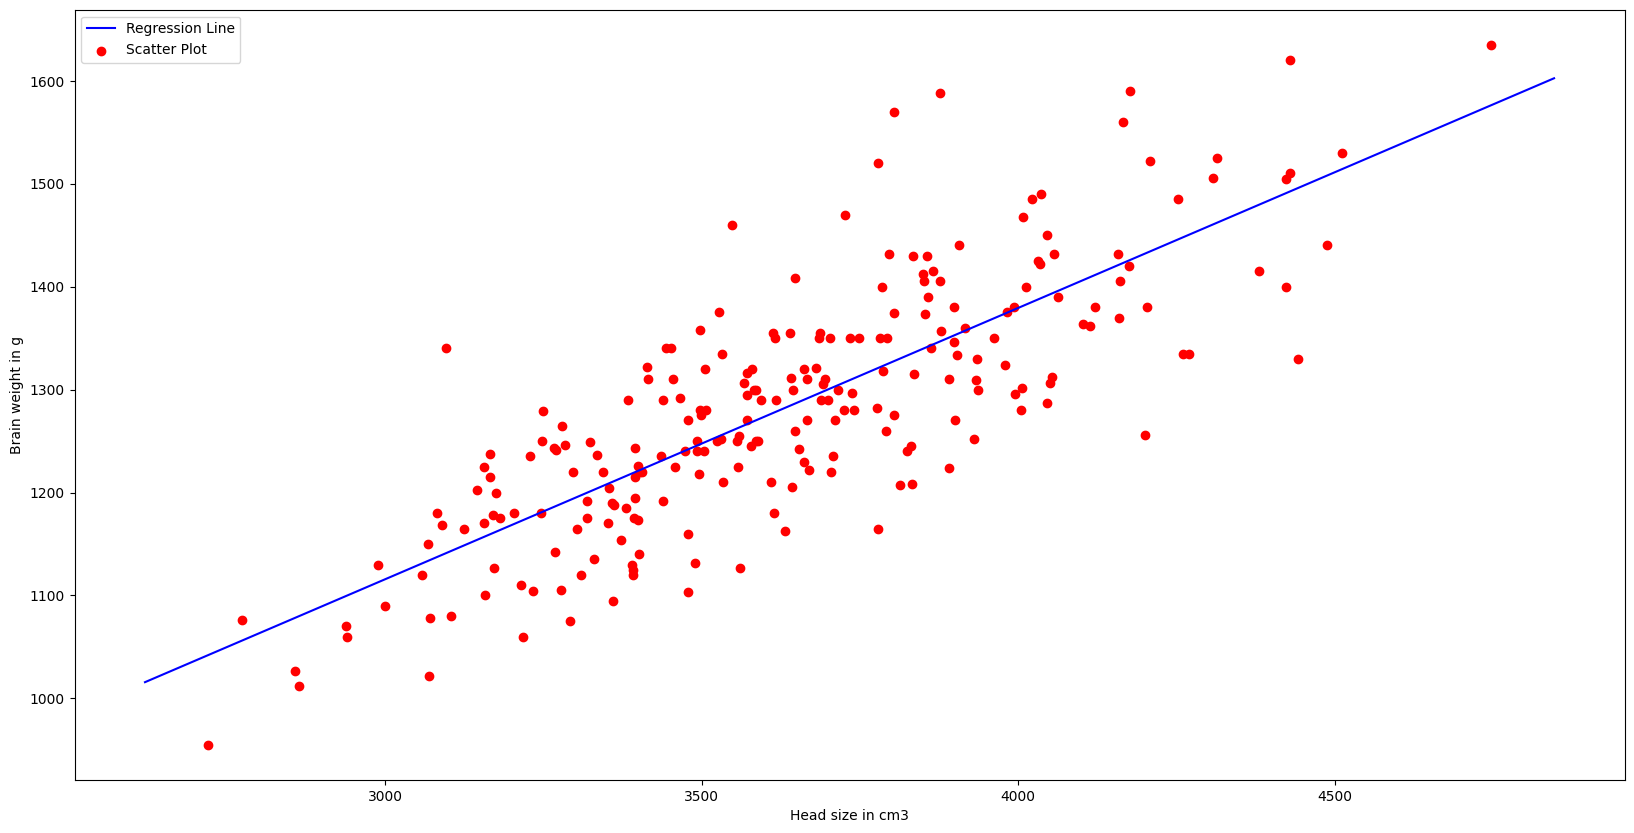

In [140]:
plt.plot(x,y,color='b', label = 'Regression Line')
plt.scatter(X,Y,color='r', label = 'Scatter Plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in g')
plt.legend()
plt.show()

### Evaluating our model using R2 (R-Squared)

In [141]:
ss_t = 0
ss_r = 0 
for i in range(n):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - y_bar) **2
    ss_r += (Y[i]- y_pred) **2
r2= 1 - (ss_r/ss_t)

In [142]:
print(r2)

0.6393117199570003


# Implementing a machine learning model using scikit-learn

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Reshape X

In [144]:
X_reshaped = X.reshape((n,1))


## Create model

In [145]:
reg = LinearRegression()

## Fitting trainning data

In [146]:
reg = reg.fit(X_reshaped,Y)

## Yp (Y prediction)

In [147]:
Y_pred = reg.predict(X_reshaped)

## Calculate MSE,RMSE and R2

In [148]:
mse = mean_squared_error(Y,Y_pred)

In [149]:
rmse = np.sqrt(mse)

In [150]:
r2_score = reg.score(X_reshaped,Y)

In [151]:
print('MSE:',mse,'\nRMSE:',rmse,'\nR2:',r2_score)

MSE: 5201.3840280023305 
RMSE: 72.1206213783709 
R2: 0.639311719957


### Scikit learn is a simple machine learning liabrary in python. It makes building a machine learning model very easy. Allowing you to do this in only a few lines of code.